In [1]:
from blackjackenv import BlackjackEnv
# setup blackjack gym environment
import gymnasium

env = BlackjackEnv(sab=True)

In [2]:
class RandomAgent:
    
    def __init__(self, env):
        self.env = env

    def get_action(self, state) -> int:
 
        return self.env.action_space.sample()

agent = RandomAgent(env)

In [3]:
from tqdm import tqdm

n_episodes = 100000
env = gymnasium.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)

# For plotting metrics
timesteps_per_episode = []
wins = []

for i in tqdm(range(0, n_episodes)):
    
    # reset environment to a random state
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    terminated = False
    
    while not terminated:
        
        action = agent.get_action(state)    
        next_state, reward, terminated, truncated, info = env.step(action)
               
        if reward == -1:
            penalties += 1

        state = next_state
        epochs += 1
    
    timesteps_per_episode.append(epochs)
    wins.append(reward)

100%|██████████| 100000/100000 [00:37<00:00, 2674.09it/s]


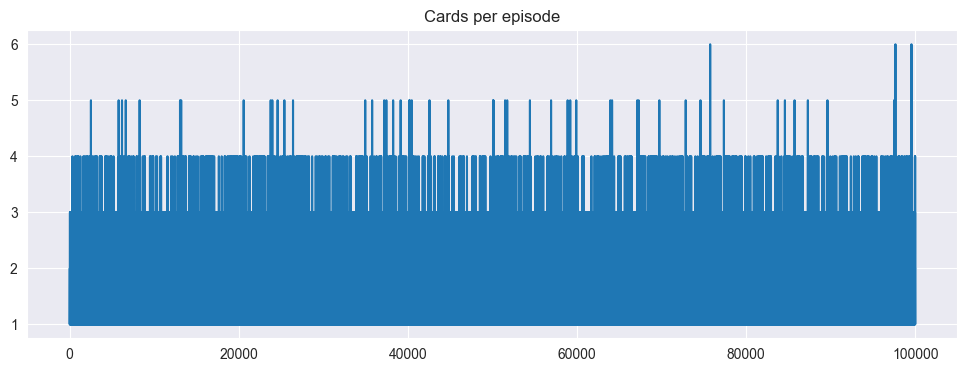

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Cards per episode")
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

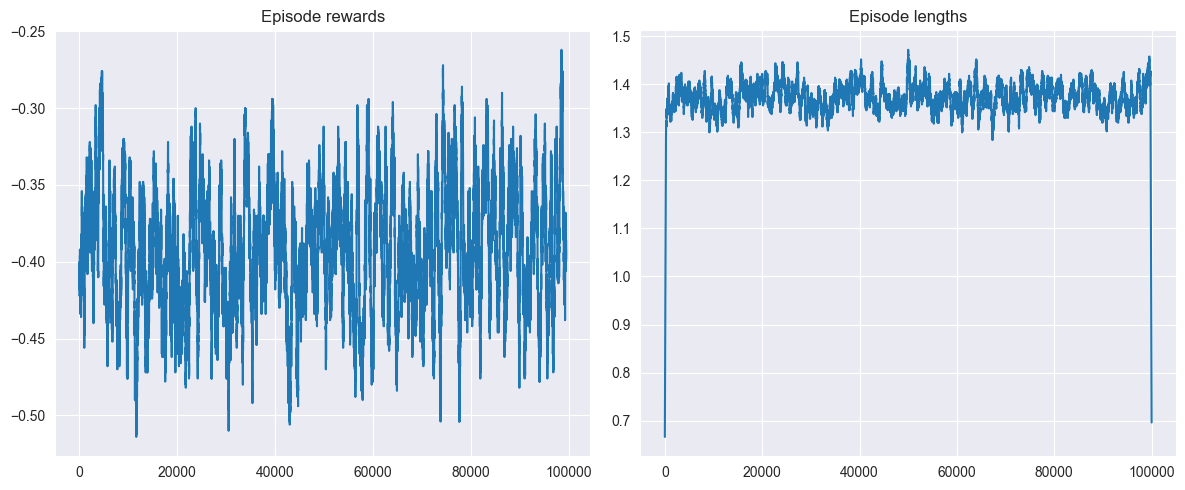

In [5]:
rolling_length = 500
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (
    np.convolve(
        np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
    / rolling_length
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[1].set_title("Episode lengths")
length_moving_average = (
    np.convolve(
        np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same"
    )
    / rolling_length
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
plt.tight_layout()
plt.show()

In [6]:
#calculate the win rate based of env.return_queue
win_rate = np.sum(np.array(env.return_queue).flatten() == 1) / len(env.return_queue)
print(win_rate)

0.28323
